In [1]:
import numpy as np
from matplotlib import pyplot as plt

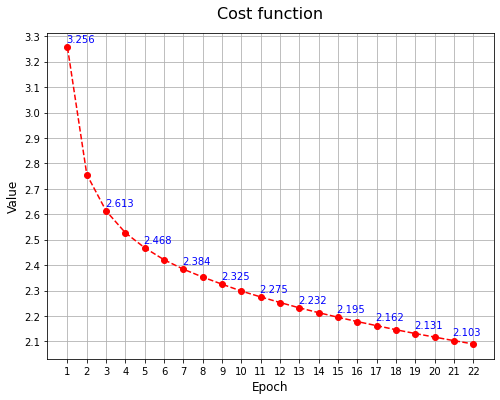

In [46]:
# best iter
steps = np.arange(1, 23)
loss = np.array([3.256, 2.756, 2.613, 2.527, 2.468, 2.421, 2.384, 2.353, 2.325, 2.298, 2.275, 2.253, 2.232, 2.213, 2.195, 2.178, 2.162, 2.146, 2.131, 2.117, 2.103, 2.09])

plt.rcParams["figure.figsize"] = (8, 6)

plt.title("Cost function", fontsize=16, y=1.025)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid('on')
plt.xticks(np.arange(1, 23))
plt.yticks(np.arange(0.0, 3.5, 0.1))
plt.plot(steps, loss, "ro--")

for i, (epoch, loss) in enumerate(zip(steps, loss)):
    if i % 2 == 1:
        continue
    plt.annotate(
                loss,
                (epoch, loss),
                textcoords="offset points",
                xytext=(13, 5),
                ha="center",
                color="blue",
            )
    
plt.savefig("cost_best.png", dpi=100)

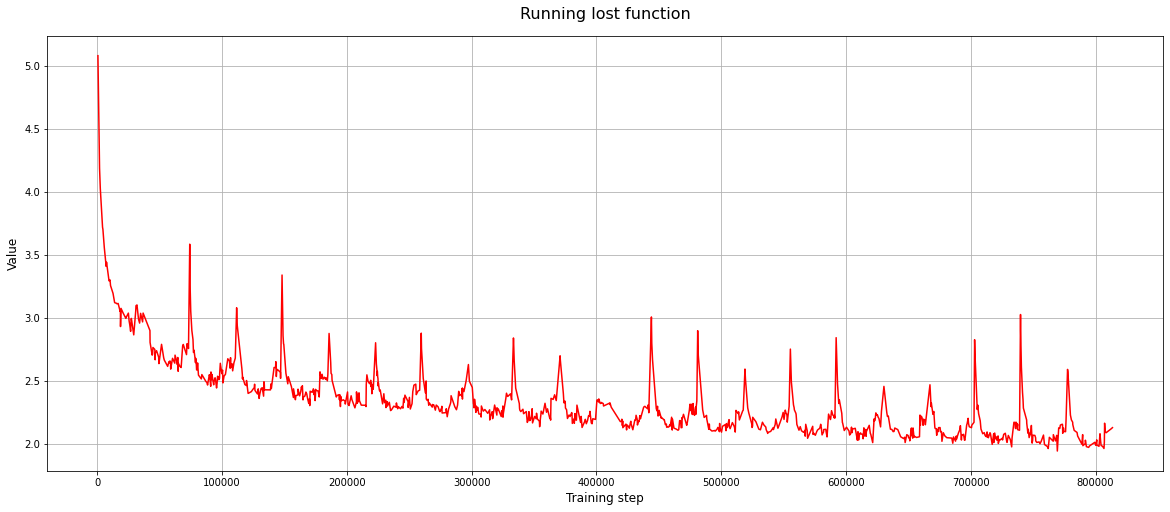

In [60]:
# running loss
import pandas as pd

plt.rcParams["figure.figsize"] = (20, 8)
df = pd.read_csv("./running.csv")[["Step", "Value"]]

plt.title("Running lost function", fontsize=16, y=1.025)
plt.xlabel("Training step", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid('on')
plt.plot(df["Step"], df["Value"], "r-")
    
plt.savefig("cost_best.png", dpi=100)

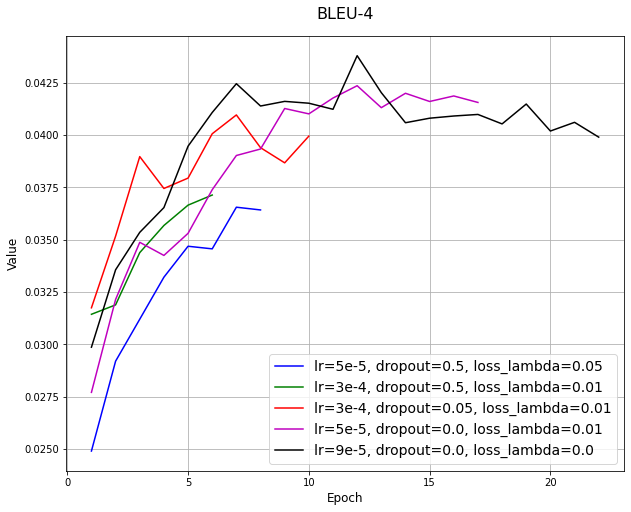

In [118]:
plt.rcParams["figure.figsize"] = (10, 8)

plt.title("BLEU-4", fontsize=16, y=1.025)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid('on')

for i, color in zip(range(1, 6), ['b', 'g', 'r', 'm', 'k']):
    df = pd.read_csv(f"{i}.csv")[["Step", "Value"]]
    plt.plot(df["Step"], df["Value"], f"{color}-")

LEGEND_PATTERN_FORMAT = f"lr={{lr}}, dropout={{dropout}}, loss_lambda={{loss_lambda}}"

plt.legend([
    LEGEND_PATTERN_FORMAT.format(lr="5e-5", dropout="0.5", loss_lambda="0.05"), 
    LEGEND_PATTERN_FORMAT.format(lr="3e-4", dropout="0.5", loss_lambda="0.01"),
    LEGEND_PATTERN_FORMAT.format(lr="3e-4", dropout="0.05", loss_lambda="0.01"),
    LEGEND_PATTERN_FORMAT.format(lr="5e-5", dropout="0.0", loss_lambda="0.01"),
    LEGEND_PATTERN_FORMAT.format(lr="9e-5", dropout="0.0", loss_lambda="0.0")], 
    loc="lower right", fontsize=14
)

plt.savefig("all_bleu.png", dpi=100)

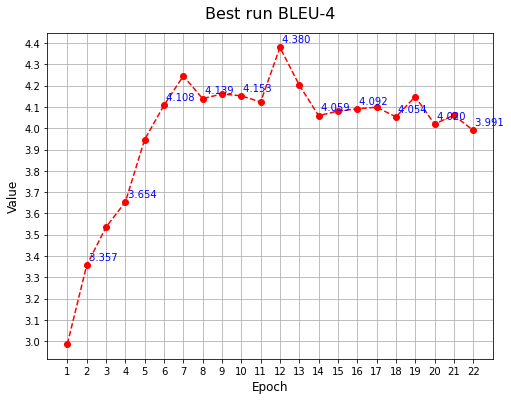

In [112]:
plt.rcParams["figure.figsize"] = (8, 6)

plt.title("Best run BLEU-4", fontsize=16, y=1.025)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid('on')
plt.xticks(np.arange(1, 23))
df["Value"] = df["Value"] * 100
plt.yticks(np.arange(0.0, 4.5, 0.1))
plt.plot(df["Step"], df["Value"], "ro--")

for i, (epoch, bleu) in enumerate(zip(df["Step"], df["Value"])):
    if i % 2 == 0:
        continue
    plt.annotate(
                f"{bleu: 0.3f}",
                (epoch, bleu),
                textcoords="offset points",
                xytext=(15, 5),
                ha="center",
                color="blue",
            )

plt.savefig("best_bleu.png", dpi=100)